# **Yoga Pose Classification**

This project focuses on building an end-to-end deep learning–based image classification system capable of identifying different yoga poses from images. The notebook demonstrates the complete industry-style workflow, from dataset acquisition to model training, evaluation, and deployment readiness.

#### **Dataset Overview**

**Title:** Yoga Pose Classification Dataset <br>
**Source:** Kaggle <br>**Dataset Link:** [https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification](https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification)


#### 1. **Project Objective**

The primary objective of this project is to:

* Classify multiple yoga poses from images with high accuracy
* Apply transfer learning using a state-of-the-art CNN architecture
* Follow a clean, reproducible, and production-aligned ML workflow

#### 2. **Environment Setup**

Ensure all required libraries are installed and imported to maintain reproducibility.

###### Key Libraries

* **TensorFlow / Keras** – Deep learning framework
* **DenseNet121** – Pre-trained CNN for transfer learning
* **KaggleHub** – Dataset download automation
* **NumPy & Pandas** – Numerical and tabular data handling
* **Matplotlib & Plotly** – Data visualization
* **Scikit-learn** – Evaluation metrics


#### 3. **Dataset Acquisition**

###### Approach

* Dataset downloaded directly from Kaggle using `kagglehub`
* Forced re-download to avoid cached or outdated versions
* Copied into a structured working directory


#### 4. **Dataset Structure & Classes**

###### Dataset Organization

* Each yoga pose is stored in a separate folder
* Folder names directly represent class labels

###### Actions Performed

* Extracted class names dynamically
* Counted number of images per class
* Ensured no hard-coded labels

###### This approach makes the pipeline scalable for new classes.


#### 5. **Exploratory Data Analysis (EDA)**

###### 5.1 Class Distribution Analysis

* Computed image count per yoga pose
* Visualized distribution using interactive Plotly bar charts

###### **Why this matters:**

* Detects class imbalance
* Guides augmentation and training strategy

###### 5.2 Visual Inspection of Images

* Randomly sampled images from each class
* Displayed multiple samples per pose

###### **Purpose:**

* Validate data quality
* Confirm correct labeling
* Identify noise or inconsistencies


#### 6. **Dataset Splitting (Train / Validation)**

###### Strategy

* 80% training data
* 20% validation data

###### Implementation Details

* Created separate directory structure for train and validation
* Copied images class-wise to preserve label consistency


#### 7. **Model Architecture & Transfer Learning**

###### Base Model: DenseNet121

* Pre-trained on ImageNet
* `include_top=False` to use as a feature extractor
* Input size: **224 × 224 × 3**

###### Freezing Layers

* All DenseNet layers frozen
* Prevents overfitting
* Reduces training time

###### Custom Classification Head

* Flatten layer
* Dense (64 neurons, ReLU)
* Output Dense layer with Softmax activation

This design follows industry-standard transfer learning practices.

#### 8. **Data Preprocessing & Augmentation**

###### Training Data Augmentation

* Rescaling
* Rotation
* Zoom
* Width & height shifts
* Horizontal flip

###### Validation Data

* Only rescaling applied

###### **Why augmentation is critical:**

* Improves robustness
* Simulates real-world variations
* Reduces overfitting

#### 9. **Model Compilation**

* **Loss Function:** Categorical Crossentropy
* **Optimizer:** Adam (learning rate = 1e-4)
* **Metric:** Accuracy

###### This setup is well-suited for multi-class image classification tasks.

#### 10. **Model Training**

###### Training Strategy

* Batch size: 8
* Epochs: up to 10
* Early stopping enabled

###### Early Stopping

* Monitors validation loss
* Stops training if no improvement for 3 epochs
* Restores best model weights

###### This prevents overfitting and unnecessary computation.


#### 11. **Training Performance Visualization**

###### Accuracy Curves

* Training accuracy vs validation accuracy

###### Loss Curves

* Training loss vs validation loss

###### These plots help diagnose:

* Overfitting
* Underfitting
* Convergence behavior

#### 12. **Model Evaluation**

###### Quantitative Metrics

* Validation accuracy
* Validation loss
* Prediction on New Images

###### Detailed Evaluation

* Classification report (precision, recall, F1-score)
* Confusion matrix–based insights


#### 13. **Model Saving**

###### Saved Model

* Format: `.keras`
* Filename: `model_dense121.keras`
* Model size calculated in MB
* Ready for deployment or inference pipelines


### 14. **Prediction on New Images**

###### Inference Workflow

1. Load and resize input image
2. Convert to array and expand dimensions
3. Apply DenseNet preprocessing
4. Predict probabilities
5. Map index to class label

###### This shows the real-world prediction pipelines used in APIs and web apps.



#### 15. **Deployment**

###### The project is deployment-ready due to:

* Saved trained model
* Consistent preprocessing pipeline
* Clearly mapped class indices

#### 16. **Conclusion**

This notebook demonstrates a complete, industry-level deep learning pipeline for yoga pose classification. It follows best practices in:

* Data handling
* Transfer learning
* Model evaluation
* Reproducibility

###### The system is scalable, interpretable, and suitable for real-world AI applications in health and fitness domains.


### **Environment Setup**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import shutil
from tqdm import tqdm
import random
import os

### **Dataset Acquisition**

In [1]:
!pip install -U kagglehub --quiet
import kagglehub, os, shutil

# Force KaggleHub to redownload instead of using Kaggle cache
path = kagglehub.dataset_download("ujjwalchowdhury/yoga-pose-classification", force_download=True)
print("✅ Downloaded to:", path)

# Verify files
!ls "$path"

# Copy to your Colab working directory
target = "/content/yoga_dataset"
shutil.copytree(path, target, dirs_exist_ok=True)
print("✅ Copied dataset to:", target)
!ls "$target"


KeyboardInterrupt: 

### **Dataset Structure & Classes**

In [ ]:

# Verify the copy
import os
os.listdir("/content/yoga_dataset")


['YogaPoses']

In [ ]:
# !mv /content/yoga_dataset/YogaPoses /content/YogaPoses



classes = sorted(os.listdir(dataset_path))



NameError: name 'dataset_path' is not defined

In [ ]:

classes = os.listdir("/content/yoga_dataset/YogaPoses")
len(classes)

classes

['Plank', 'Goddess', 'Warrior2', 'Downdog', 'Tree']

In [ ]:
# Path to your dataset
dataset_path = "/content/yoga_dataset/YogaPoses"

# Get all class folder names
classes = sorted(os.listdir(dataset_path))
classes


['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [ ]:
IMAGE_SIZE = [224,224]



In [ ]:
# SIZE = [224,224] + [3]
# SIZE

SIZE = (224, 224, 3)
SIZE

(224, 224, 3)

### **Exploratory Data Analysis (EDA)**

In [ ]:


# Path to your dataset
dataset_path = "/content/yoga_dataset/YogaPoses"

# Get all class folder names
classes = sorted(os.listdir(dataset_path))


class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Convert to DataFrame
df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image_Count"])

# 📊 Create Plotly bar chart (Seaborn-style)
fig = px.bar(
    df,
    x="Image_Count",
    y="Class",
    orientation="h",
    color="Class",
    text="Image_Count",
    color_discrete_sequence=px.colors.qualitative.Set2,  # Seaborn-like palette
    title="Number of Images per Yoga Pose Class"
)

# 🧠 Add figure size & Seaborn-style aesthetics
fig.update_layout(
    template="simple_white",
    width=900,      # ✅ Figure width
    height=500,     # ✅ Figure height (increase if many classes)
    xaxis_title="Number of Images",
    yaxis_title="Yoga Pose Class",
    plot_bgcolor="white",
    showlegend=False,
    font=dict(size=14)
)

# Show text outside bars for clarity
fig.update_traces(textposition="outside")

# Display
fig.show()


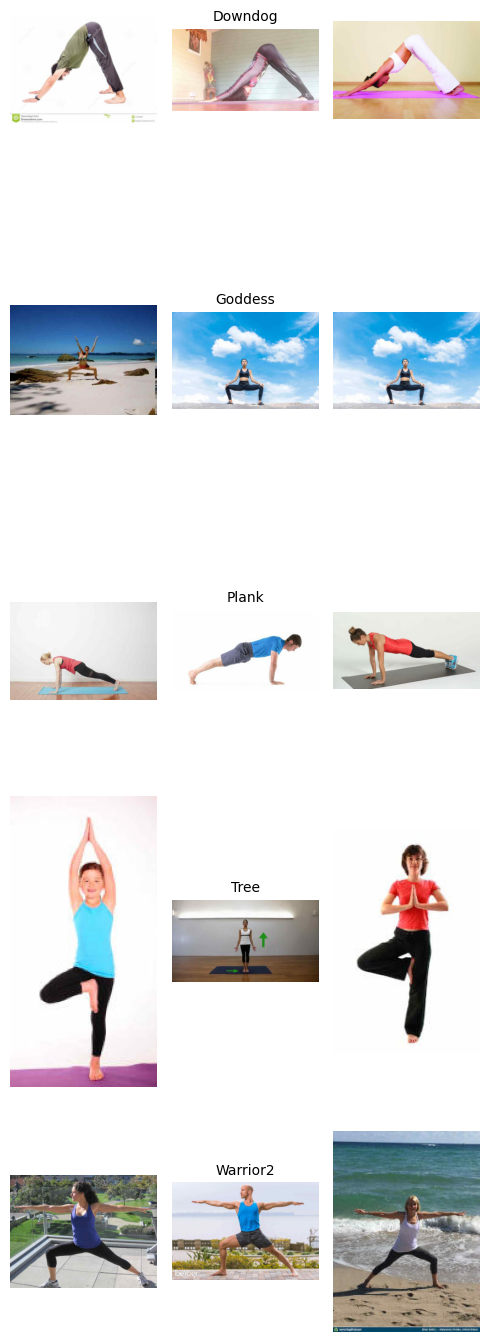

In [ ]:


classes = sorted(os.listdir(dataset_path))

# Number of samples per class to display
samples_per_class = 3

# Set up the figure size (taller for vertical layout)
plt.figure(figsize=(5, len(classes)*3))

for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)
    random_imgs = random.sample(images, min(samples_per_class, len(images)))

    for j, img_name in enumerate(random_imgs):
        img_path = os.path.join(class_path, img_name)
        img = mpimg.imread(img_path)

        # subplot index (vertical layout)
        plt.subplot(len(classes), samples_per_class, i * samples_per_class + j + 1)
        plt.imshow(img)
        plt.axis('off')
        if j == 1:  # show label in middle column
            plt.title(cls, fontsize=10)

plt.tight_layout()
plt.show()


### **Dataset Splitting (Train / Validation)**

In [ ]:
# spliiting the dataset for training and validating

# Paths
base_dir = "/content/yoga_split"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")


# create train and val directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# train/val split ratio

split_ratio = 0.8


for cls in tqdm(classes, desc='Splitting dataset'):
    cls_dir = os.path.join(dataset_path, cls)
    images = os.listdir(cls_dir)
    random.shuffle(images)

    split_point = int(len(images) * split_ratio)
    train_images = images[:split_point]
    val_images = images[split_point:]

    # make class folders in train/val

    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)


    for img in train_images:
      shutil.copy(os.path.join(cls_dir, img), os.path.join(train_dir, cls, img))
    for img in val_images:
      shutil.copy(os.path.join(cls_dir, img), os.path.join(val_dir, cls, img))


print("✅ Train-test split complete!")


Splitting dataset: 100%|██████████| 5/5 [00:00<00:00, 33.55it/s]

✅ Train-test split complete!


In [ ]:
for folder in ["train", "val"]:
    path = os.path.join(base_dir, folder)
    total = sum(len(os.listdir(os.path.join(path, c))) for c in os.listdir(path))
    print(f"{folder} images:", total)


train images: 952
val images: 364


In [ ]:


train_path = '/content/yoga_split/train'
valid_path = '/content/yoga_split/val'

### **Model Architecture & Transfer Learning**

In [ ]:

densenet = DenseNet121(input_shape=SIZE, weights='imagenet', include_top=False)


In [ ]:
for layer in densenet.layers:
  print(layer.trainable)



True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
for layer in densenet.layers:
  layer.trainable = False

In [ ]:
for layer in densenet.layers:
  print(layer.trainable)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
for layer in densenet.layers:
  print(layer.name, layer.trainable)

input_layer_1 False
zero_padding2d_2 False
conv1_conv False
conv1_bn False
conv1_relu False
zero_padding2d_3 False
pool1 False
conv2_block1_0_bn False
conv2_block1_0_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_concat False
conv2_block2_0_bn False
conv2_block2_0_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_concat False
conv2_block3_0_bn False
conv2_block3_0_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_concat False
conv2_block4_0_bn False
conv2_block4_0_relu False
conv2_block4_1_conv False
conv2_block4_1_bn False
conv2_block4_1_relu False
conv2_block4_2_conv False
conv2_block4_concat False
conv2_block5_0_bn False
conv2_block5_0_relu False
conv2_block5_1_conv False
conv2_block5_1_bn False
conv2_block5_1_relu False
conv2_block5_2_conv False
conv2_blo

In [ ]:
densenet.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
folders = glob('/content/yoga_split/train/*')
folders

['/content/yoga_split/train/Plank',
 '/content/yoga_split/train/Goddess',
 '/content/yoga_split/train/Warrior2',
 '/content/yoga_split/train/Downdog',
 '/content/yoga_split/train/Tree']

In [ ]:
num_of_classes = len(folders)
num_of_classes

5

In [ ]:
model = Sequential()
model.add(densenet)
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_of_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,249,157 (39.10 MB)

 Trainable params: 3,211,653 (12.25 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

### **Data Preprocessing & Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip= True)


test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (224,224),
                                              batch_size = 8,
                                              class_mode = 'categorical')

Found 952 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                              target_size = (224,224),
                                              batch_size = 8,
                                              class_mode = 'categorical')

Found 364 images belonging to 5 classes.


### **Model Compilation**

In [ ]:
model.compile(
      loss='categorical_crossentropy',
      optimizer=Adam(learning_rate=1e-4),
      metrics=['accuracy']
)

### **Model Training**

In [ ]:
# Stop training if validation loss does not improve for 3 consecutive epochs
early_stop = EarlyStopping(
    monitor='val_loss',     # Metric to monitor
    patience=3,             # Number of epochs with no improvement after which training stops
    restore_best_weights=True, # Restores the model weights from the epoch with the best value of the monitored metric
    verbose=1
)


In [ ]:
m = model.fit(train_set, validation_data=test_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(test_set),  callbacks=[early_stop])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 65s 318ms/step - accuracy: 0.5585 - loss: 1.2525 - val_accuracy: 0.9725 - val_loss: 0.1288
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.8584 - loss: 0.4265 - val_accuracy: 0.9725 - val_loss: 0.0794
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.9084 - loss: 0.2919 - val_accuracy: 0.9753 - val_loss: 0.0834
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.9192 - loss: 0.2139 - val_accuracy: 0.9780 - val_loss: 0.0767
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.9264 - loss: 0.2063 - val_accuracy: 0.9918 - val_loss: 0.0251
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.9409 - loss: 0.1831 - val_accuracy: 0.9890 - val_loss: 0.0285
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.9599 - loss: 0.1163 - val_accuracy: 0.9973 - val_loss: 0.0203
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.9486 - loss: 0

### **Training Performance Visualization**





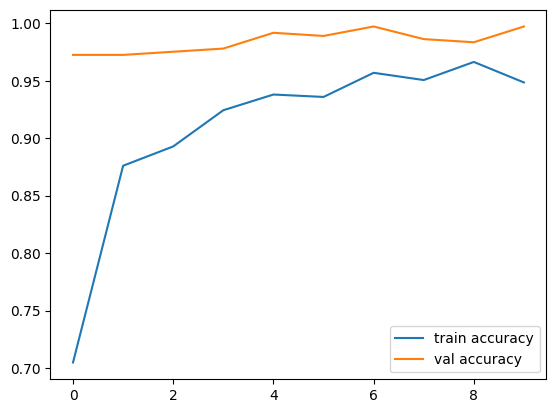

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(m.history['accuracy'], label='train accuracy')
plt.plot(m.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

plt.show()

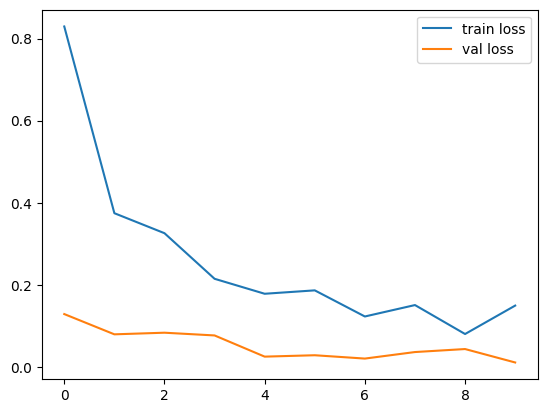

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(m.history['loss'], label='train loss')
plt.plot(m.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

plt.show()

### **Model Evaluation**


In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(test_set, steps=len(test_set))
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9943 - loss: 0.0154
Test Loss: 0.0108
Test Accuracy: 0.9973


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# True labels
y_true = test_set.classes

# Predict probabilities
y_pred_prob = model.predict(test_set, steps=len(test_set))

# Convert probabilities to class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
from sklearn.metrics import classification_report
class_names = list(test_set.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))


46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 286ms/step
              precision    recall  f1-score   support

     Downdog       0.20      0.20      0.20        74
     Goddess       0.24      0.24      0.24        72
       Plank       0.21      0.21      0.21        73
        Tree       0.18      0.18      0.18        72
    Warrior2       0.22      0.22      0.22        73

    accuracy                           0.21       364
   macro avg       0.21      0.21      0.21       364
weighted avg       0.21      0.21      0.21       364



In [ ]:
model.evaluate(test_set)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9990 - loss: 0.0126


[0.010841880924999714, 0.9972527623176575]

### **Model Saving**

In [ ]:

from tensorflow.keras.models import load_model

model.save('model_dense121.keras')


### **Prediction on New Images**

In [ ]:
img = '/content/yoga.jpg'
img =image.load_img(img, target_size=(224, 224))

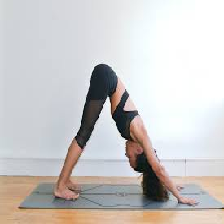

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[213., 217., 218.],
        [212., 216., 217.],
        [211., 215., 216.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[213., 217., 218.],
        [212., 216., 217.],
        [211., 215., 216.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[213., 217., 218.],
        [212., 216., 217.],
        [211., 215., 216.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[207., 173., 136.],
        [207., 173., 136.],
        [207., 173., 136.],
        ...,
        [235., 216., 199.],
        [234., 212., 189.],
        [234., 212., 189.]],

       [[207., 173., 136.],
        [207., 173., 136.],
        [207., 173., 136.],
        ...,
        [232., 213., 196.],
        [233., 211., 188.],
        [233., 211., 188.]],

       [[208., 174., 137.],
        [208., 174., 137.],
        [208., 1

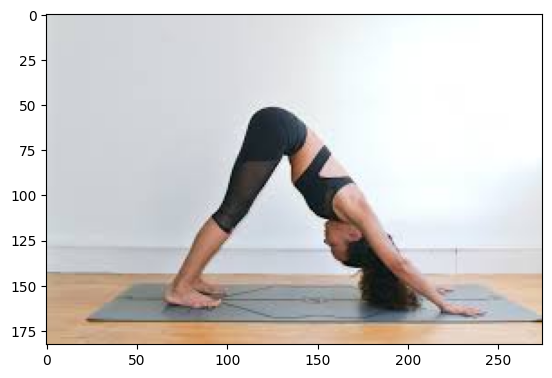

In [ ]:
Z = plt.imread('/content/yoga.jpg')
plt.imshow(Z)
plt.show()

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/255

In [ ]:
from tensorflow.keras.applications.densenet import preprocess_input
# x = np.expand_dims(x , axis=0)
# img_data = preprocess_input(x)


In [ ]:
output = model.predict(img_data)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


array([[0.01330927, 0.29059196, 0.11690319, 0.5669401 , 0.01225545]],
      dtype=float32)

In [ ]:
# Path to your image
img_path = "/content/yoga2.jpg"  # replace with your image path

# Load the image and resize to model input size (224x224 for DenseNet121)
img = image.load_img(img_path, target_size=(224, 224))

# Convert to array
img_array = image.img_to_array(img)

# Expand dimensions to create batch of 1
img_array = np.expand_dims(img_array, axis=0)

# Preprocess for DenseNet121
img_array = preprocess_input(img_array)


In [ ]:
# Predict
pred_probs = model.predict(img_array)

# Get predicted class index
pred_class_index = np.argmax(pred_probs, axis=1)[0]

# Map index to class name
class_names = list(train_set.class_indices.keys())
pred_class_name = class_names[pred_class_index]

print(f"Predicted class: {pred_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Predicted class: Tree


### **Model Size**

In [ ]:
from google.colab import files

# Path to your saved model
model_path = "/content/model_dense121.h5"

# Download to your local system
files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

size_bytes = os.path.getsize(model_path)
size_mb = size_bytes / (1024 * 1024)  # Convert to MB
print(f"Model size: {size_mb:.2f} MB")


Model size: 65.05 MB


### **Conclusion**

This notebook demonstrates a complete, industry-level deep learning pipeline for yoga pose classification. It follows best practices in:

* Data handling
* Transfer learning
* Model evaluation
* Reproducibility
* The system is scalable, interpretable, and suitable for real-world AI applications in health and fitness domains.